In [8]:
import pandas as pd
'''
Problem 1
Basic Data Exploration & Trend Visualization
Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)
Objective:
Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.
'''
df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding_errors='ignore')
df.info()

'''
Tasks:
Complete all the Following Tasks:
1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi_2022_df (used for all subsequent tasks in Problem 1A).
'''
specific_year = df['year'].unique()
hdi_2022_df = df[df['year'] == 2022]

'''
2. Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.
'''
print("-" * 50)

hdi_2022_df.head(10)

num_rows, num_cols = hdi_2022_df.shape
print(f"Total rows : {num_rows}")
print(f"Total columns: {num_cols}")

columns = hdi_2022_df.columns
data_types = hdi_2022_df[columns].dtypes
print(data_types)

'''
3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
 - numeric columns stored as text,
 - inconsistent or misspelled country names,
 - duplicate rows,
 - special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
 - convert data types where needed,
 - remove duplicates,
 - handle missing values (drop or impute; justify your choice).
'''
print("-" * 50)

print(hdi_2022_df[columns].isna().sum())

# dropping duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()

# identifying columns that contain missing values
null_cols = list()
for col in columns:
  if (hdi_2022_df[col].isnull().sum() > 0):
    null_cols.append(col)

# handling missing values in numeric columns by median imputation
for col in null_cols:
  if hdi_2022_df[col].dtype in ['int64', 'float64']:
    hdi_2022_df[col] = hdi_2022_df[col].fillna(hdi_2022_df[col].median())

print(hdi_2022_df[columns].isna().sum())

'''
4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.
'''
print("-" * 50)

hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print("HDI Mean: ",hdi_mean)
print("HDI Median: ",hdi_median)
print("HDI Standard Deviation: ",hdi_std)

highest_hdi_index = hdi_2022_df['hdi'].idxmax()
highest_hdi_country = hdi_2022_df.loc[highest_hdi_index, 'country']

lowest_hdi_index = hdi_2022_df['hdi'].idxmin()
lowest_hdi_country = hdi_2022_df.loc[lowest_hdi_index, 'country']

print("Country with the highest HDI in 2022:", highest_hdi_country, highest_hdi_index)
print("Country with the lowest HDI in 2022:", lowest_hdi_country, lowest_hdi_index)

'''
5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
  descending order.
• Display the top 10 countries.
'''
print("-" * 50)

higher_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
higher_hdi_df = higher_hdi_df.sort_values(by='gross_inc_percap', ascending=False)

display(higher_hdi_df.iloc[:10])

'''
6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
  Human Development Index groups. The classification should be based on the HDI value for the
  year 2022. Use the following categories and thresholds defined by the United Nations Development
  Programme (UNDP):

  HDI Category HDI Range (hdi)
  Low < 0.550
  Medium 0.550 – 0.699
  High 0.700 – 0.799
  Very ≥ 0.800
'''
print("-" * 50)

hdi_2022_df['HDI Category'] = None

for i in hdi_2022_df.index:
    hdi_value = hdi_2022_df.loc[i, 'hdi']
    if hdi_value < 0.550:
        hdi_2022_df.loc[i, 'HDI Category'] = 'Low'
    elif hdi_value < 0.700:
        hdi_2022_df.loc[i, 'HDI Category'] = 'Medium'
    elif hdi_value < 0.800:
        hdi_2022_df.loc[i, 'HDI Category'] = 'High'
    else:
        hdi_2022_df.loc[i, 'HDI Category'] = 'Very'

display(hdi_2022_df[['hdi','HDI Category']].head(10))

# printing top 10 countries with HDI > 0.800 (sorted by GNI per Capita)
top_10_gni = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].sort_values(by='gross_inc_percap', ascending=False)
print(top_10_gni[['country', 'hdi', 'gross_inc_percap']].head(10))

'''
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final submission.
'''
hdi_2022_df.info()
hdi_2022_df.to_csv("HDI category added.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,0.360,66.521111,69.519997,28.000000,72.000000,52.79,67.26,3.736776,9.9662
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,0.360,77.866913,84.067802,25.308426,74.691574,52.91,64.71,4.373242,9.9662


--------------------------------------------------


,hdi,HDI Category
32,0.462,Low
65,0.789,High
98,0.745,High
131,0.884,Very
164,0.591,Medium
197,0.826,Very
230,0.849,Very
263,0.786,High
296,0.946,Very
329,0.926,Very


                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516
<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year               

country    0
year       0
hdi        0
dtype: int64


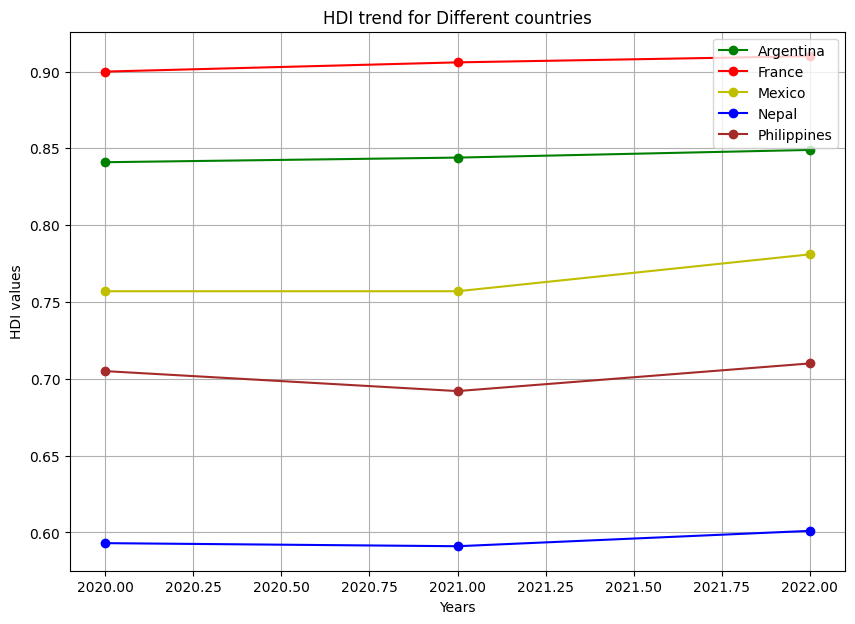

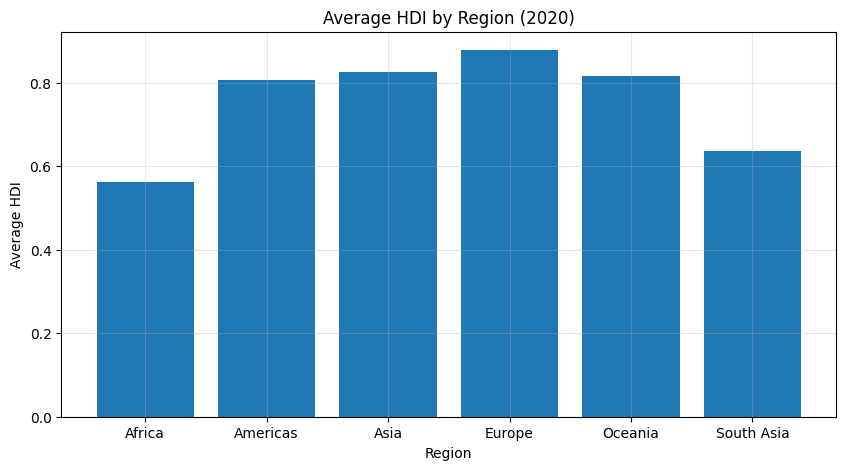

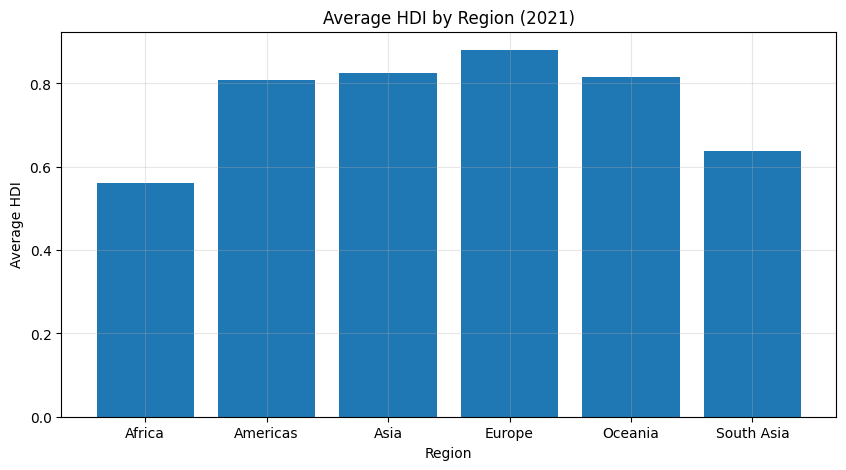

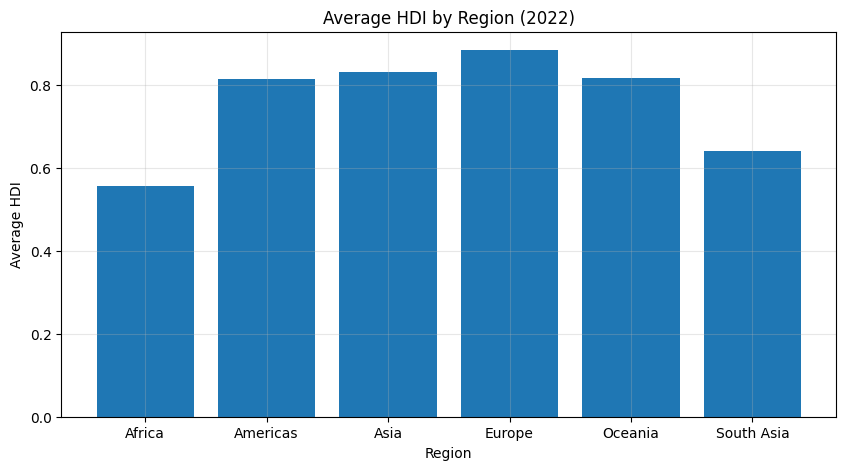

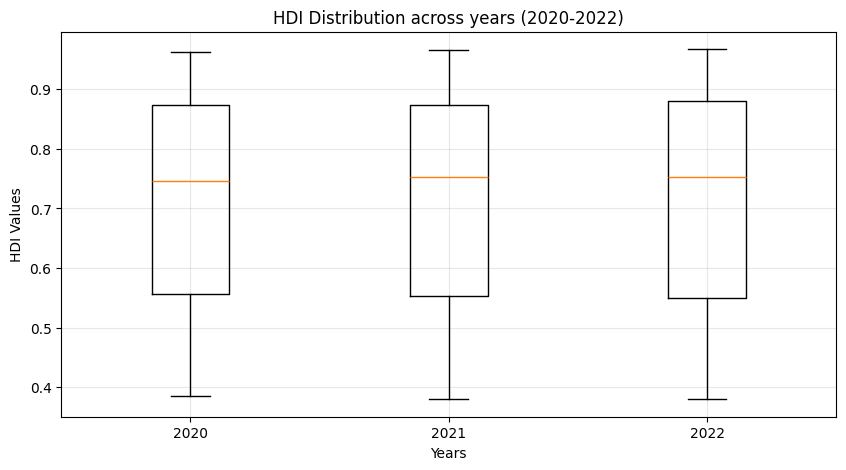

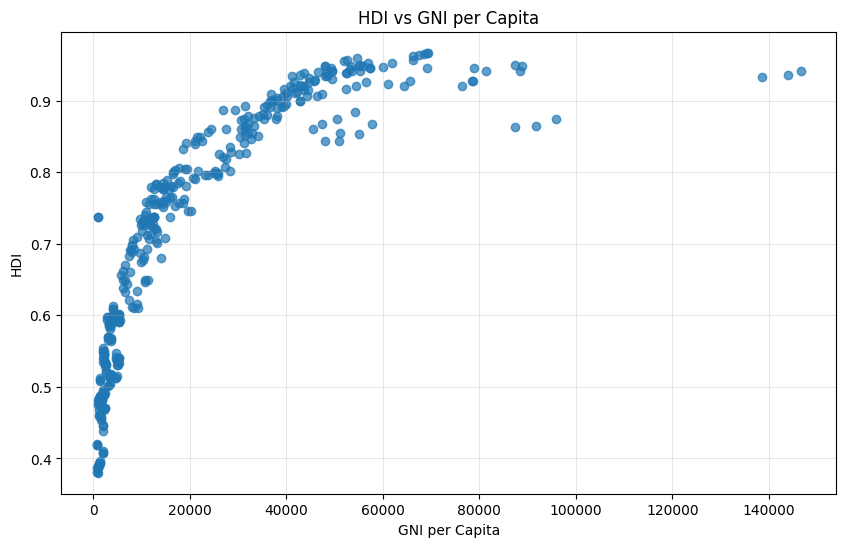

In [9]:
'''
Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.

Tasks:
Complete all the Following Tasks:
1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.
'''
import pandas as pd

#reading csv file
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding_errors='ignore')

#filtering dataset with year 2020,2021,2022
filtered_dataset = df[df['year'].isin([2020,2021,2022])]

#saving dataset to csv file
filtered_dataset.to_csv("HDI_problem1B.csv")

'''
2. Data Cleaning:
• Check for missing values in the following essential columns:
  – hdi
  – country
  – year
• Identify and address the following issues:
  – missing or null values,
  – inconsistent or misspelled country names,
  – duplicate rows,
  – numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
  – handling missing values (dropping or imputing),
  – converting data types appropriately,
  – removing duplicate entries,
  – ensuring consistent naming conventions for countries and years.
• All cleaning decisions must be clearly justified in the final report.
'''
filtered_dataset[['country', 'year', 'hdi']].isnull().sum()
filtered_dataset = filtered_dataset.dropna(subset=['country', 'year'])

#identifing null columns
na_cols = list()

for col in filtered_dataset.columns:
    if filtered_dataset[col].isnull().sum() > 0:
        na_cols.append(col)

#imputing null columns with its median
for col in na_cols:
    if filtered_dataset[col].dtype in ['int64', 'float64']:
        filtered_dataset[col] = filtered_dataset[col].fillna(
            filtered_dataset[col].median()
        )

filtered_dataset = filtered_dataset.drop_duplicates()

print(filtered_dataset[['country', 'year', 'hdi']].isnull().sum())

'''
3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
  – Select any five countries (or five countries from a region of your choice).
  – Plot HDI values for each country across the years 2020, 2021, and 2022.
  – Ensure the chart includes appropriate axis labels, a legend, and an informative caption.
'''
import matplotlib.pyplot as plt

# five countries from different regions: France, Nepal, Australia, Canada and Singapore
argentina_df = filtered_dataset[filtered_dataset['country']=='Argentina']
france_df = filtered_dataset[filtered_dataset['country']=='France']
mexico_df = filtered_dataset[filtered_dataset['country']=='Mexico']
nepal_df = filtered_dataset[filtered_dataset['country']=='Nepal']
philippines_df = filtered_dataset[filtered_dataset['country']=='Philippines']

plt.figure(figsize=(10,7))
plt.title("HDI trend for Different countries")
plt.plot(argentina_df['year'].values, argentina_df['hdi'], marker='o', c='g', label="Argentina")
plt.plot(france_df['year'].values, france_df['hdi'], marker='o', c='r', label="France")
plt.plot(mexico_df['year'].values, mexico_df['hdi'], marker='o', c='y', label="Mexico")
plt.plot(nepal_df['year'].values, nepal_df['hdi'], marker='o', c='b', label="Nepal")
plt.plot(philippines_df['year'].values, philippines_df['hdi'], marker='o', c='brown', label="Philippines")
plt.legend()
plt.xlabel("Years")
plt.ylabel("HDI values")
plt.grid()

# classifying countries by region
region_map = {
    # South Asia
    'AFG': 'South Asia', 'BGD': 'South Asia', 'BTN': 'South Asia',
    'IND': 'South Asia', 'MDV': 'South Asia', 'NPL': 'South Asia',
    'PAK': 'South Asia', 'LKA': 'South Asia',

    # Europe
    'ALB': 'Europe', 'AND': 'Europe', 'AUT': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BGR': 'Europe', 'HRV': 'Europe', 'CYP': 'Europe',
    'CZE': 'Europe', 'DNK': 'Europe', 'EST': 'Europe', 'FIN': 'Europe',
    'FRA': 'Europe', 'DEU': 'Europe', 'GRC': 'Europe', 'HUN': 'Europe',
    'ISL': 'Europe', 'IRL': 'Europe', 'ITA': 'Europe', 'LVA': 'Europe',
    'LIE': 'Europe', 'LTU': 'Europe', 'LUX': 'Europe', 'MLT': 'Europe',
    'MCO': 'Europe', 'MNE': 'Europe', 'NLD': 'Europe', 'MKD': 'Europe',
    'NOR': 'Europe', 'POL': 'Europe', 'PRT': 'Europe', 'ROU': 'Europe',
    'RUS': 'Europe', 'SMR': 'Europe', 'SRB': 'Europe', 'SVK': 'Europe',
    'SVN': 'Europe', 'ESP': 'Europe', 'SWE': 'Europe', 'CHE': 'Europe',
    'UKR': 'Europe', 'GBR': 'Europe',

    # Africa
    'DZA': 'Africa', 'AGO': 'Africa', 'BEN': 'Africa', 'BWA': 'Africa',
    'BFA': 'Africa', 'BDI': 'Africa', 'CPV': 'Africa', 'CMR': 'Africa',
    'CAF': 'Africa', 'TCD': 'Africa', 'COM': 'Africa', 'COG': 'Africa',
    'COD': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa', 'EGY': 'Africa',
    'GNQ': 'Africa', 'ERI': 'Africa', 'SWZ': 'Africa', 'ETH': 'Africa',
    'GAB': 'Africa', 'GMB': 'Africa', 'GHA': 'Africa', 'GIN': 'Africa',
    'GNB': 'Africa', 'KEN': 'Africa', 'LSO': 'Africa', 'LBR': 'Africa',
    'LBY': 'Africa', 'MDG': 'Africa', 'MWI': 'Africa', 'MLI': 'Africa',
    'MRT': 'Africa', 'MUS': 'Africa', 'MAR': 'Africa', 'MOZ': 'Africa',
    'NAM': 'Africa', 'NER': 'Africa', 'NGA': 'Africa', 'RWA': 'Africa',
    'STP': 'Africa', 'SEN': 'Africa', 'SYC': 'Africa', 'SLE': 'Africa',
    'SOM': 'Africa', 'ZAF': 'Africa', 'SSD': 'Africa', 'SDN': 'Africa',
    'TZA': 'Africa', 'TGO': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa',
    'ZMB': 'Africa', 'ZWE': 'Africa',

    # North & South America
    'ARG': 'Americas', 'BOL': 'Americas', 'BRA': 'Americas',
    'CAN': 'Americas', 'CHL': 'Americas', 'COL': 'Americas',
    'MEX': 'Americas', 'PER': 'Americas', 'USA': 'Americas',

    # Asia (excluding South Asia)
    'CHN': 'Asia', 'IDN': 'Asia', 'IRN': 'Asia', 'ISR': 'Asia',
    'JPN': 'Asia', 'KOR': 'Asia', 'MYS': 'Asia', 'PHL': 'Asia',
    'QAT': 'Asia', 'SAU': 'Asia', 'SGP': 'Asia', 'THA': 'Asia',
    'TUR': 'Asia', 'VNM': 'Asia',

    # Oceania
    'AUS': 'Oceania', 'NZL': 'Oceania', 'PNG': 'Oceania'
}

# mapping iso3 codes to regions
filtered_dataset = filtered_dataset.copy()
filtered_dataset.loc[:, 'Region'] = filtered_dataset['iso3'].map(region_map)

# removing rows without region info
filtered_dataset = filtered_dataset.dropna(subset=['Region'])

'''
• B. Generate Visualizations:
  – Bar Chart: Average HDI by Region (2020–2022)
    ∗ Group the dataset by Region and Year.
    ∗ Compute the mean HDI for each region-year pair.
    ∗ Plot a bar chart comparing average HDI across regions for each year.
    ∗ Label axes clearly and include a descriptive title.
'''
# grouping the dataset by region and year
region_year_group = filtered_dataset.groupby(['Region', 'year'])['hdi'].mean()

# converting grouped data to a usable format
region_year_df = region_year_group.reset_index()

# separating data for each year
data_2020 = region_year_df[region_year_df['year']==2020]
data_2021 = region_year_df[region_year_df['year']==2021]
data_2022 = region_year_df[region_year_df['year']==2022]

# plotting bar charts
# 2020
plt.figure(figsize=(10,5))
plt.bar(data_2020['Region'], data_2020['hdi'])
plt.title("Average HDI by Region (2020)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.grid(alpha=0.3)
plt.show()

# 2021
plt.figure(figsize=(10,5))
plt.bar(data_2021['Region'], data_2021['hdi'])
plt.title("Average HDI by Region (2021)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.grid(alpha=0.3)
plt.show()

# 2022
plt.figure(figsize=(10,5))
plt.bar(data_2022['Region'], data_2022['hdi'])
plt.title("Average HDI by Region (2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.grid(alpha=0.3)
plt.show()

'''
- Box Plot: HDI Distribution for 2020, 2021, and 2022
  ∗ Filter the dataset for the years 2020, 2021, and 2022.
  ∗ Create a box plot showing HDI spread for each of the three years.
  ∗ Include titles and axis labels.
  ∗ Comment briefly on distribution differences.
'''
# filter dataset for 2020, 2021, and 2022
plotting_years = [2020, 2021, 2022]
hdi_data = [filtered_dataset[filtered_dataset['year']==year]['hdi'] for year in plotting_years]

# box plotting hdi distribution
plt.figure(figsize=(10,5))
plt.boxplot(hdi_data, labels=plotting_years)
plt.title("HDI Distribution across years (2020-2022)")
plt.xlabel("Years")
plt.ylabel("HDI Values")
plt.grid(alpha=0.3)
plt.show()

'''
- Scatter Plot: HDI vs. GNI per Capita
  ∗ Check if the dataset contains a column for GNI per Capita.
  ∗ If available:
    · Create a scatter plot using HDI as the dependent variable.
    · Use GNI per Capita on the x-axis.
    · Add a regression line (optional).
  ∗ If the variable is missing, write:
  "GNI per Capita variable not available in the dataset."
'''
# Checking if GNI per Capita column exists
if 'gross_inc_percap' in filtered_dataset.columns:
    plt.figure(figsize=(10,6))
    plt.scatter(filtered_dataset['gross_inc_percap'], filtered_dataset['hdi'], alpha=0.7)
    plt.title("HDI vs GNI per Capita")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")

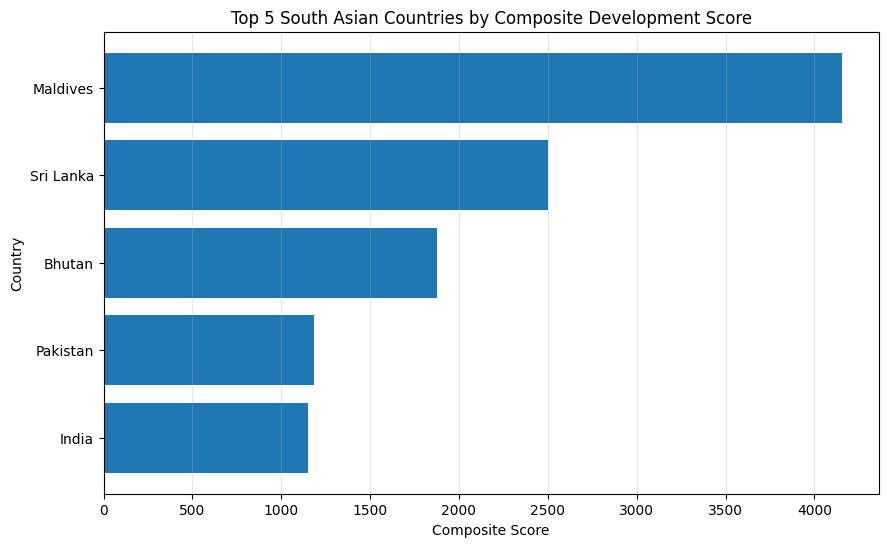

Top 5 ranking of countries by Composite Score with their HDI ranking:
           composite_score       hdi
country                             
Maldives       4154.252676  0.682500
Sri Lanka      2502.612949  0.715606
Bhutan         1878.321569  0.634538
Pakistan       1184.282350  0.472545
India          1151.101140  0.541485
Total number of outliers: 19
Detected outliers countries: ['Maldives' 'Sri Lanka']


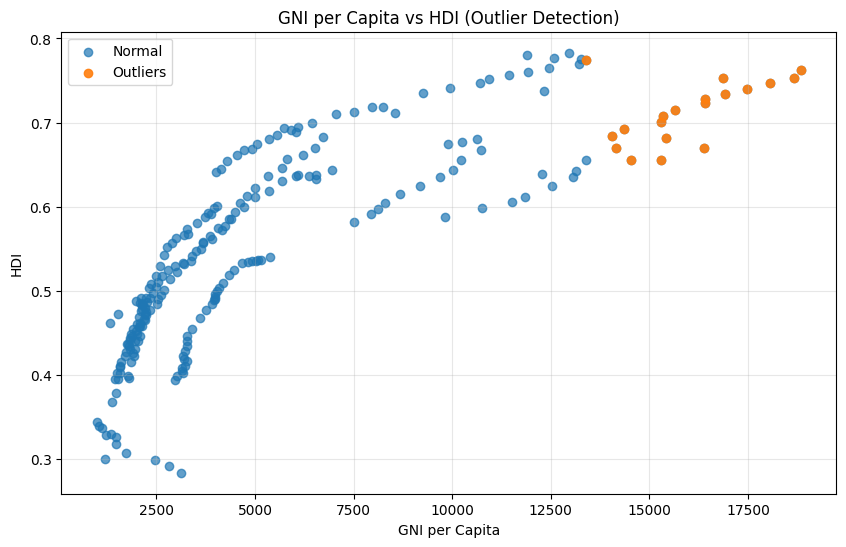

Gender Development Index vs HDI correlation: 0.6731
Life Expectancy Index vs HDI correlation: 0.9188


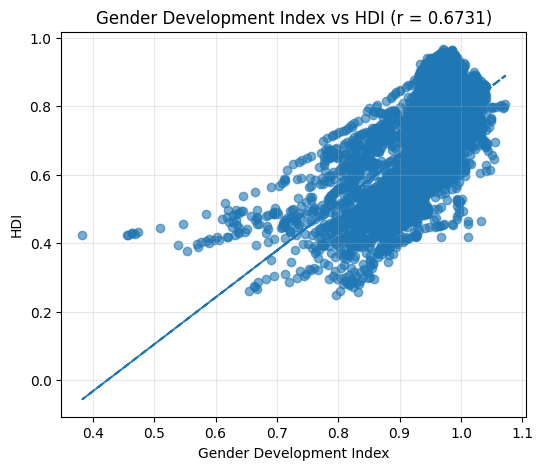

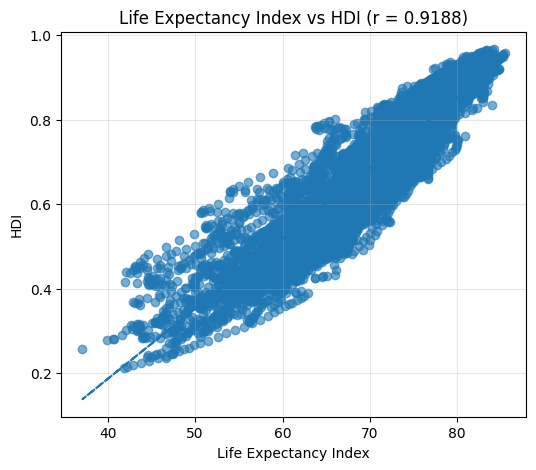

Life Expectancy shows a stronger relationship with HDI.
Gender Development shows a weaker relationship with HDI.
Top 3 countries by GNI_HDI_Gap in descending order:
country
Maldives     14670.635594
Bhutan        9320.175767
Sri Lanka     8268.373527
Name: gni_hdi_gap, dtype: float64
Top 3 countries by GNI_HDI_Gap in ascending order:
country
Afghanistan    1793.487770
Nepal          2532.443971
Bangladesh     3408.490410
Name: gni_hdi_gap, dtype: float64


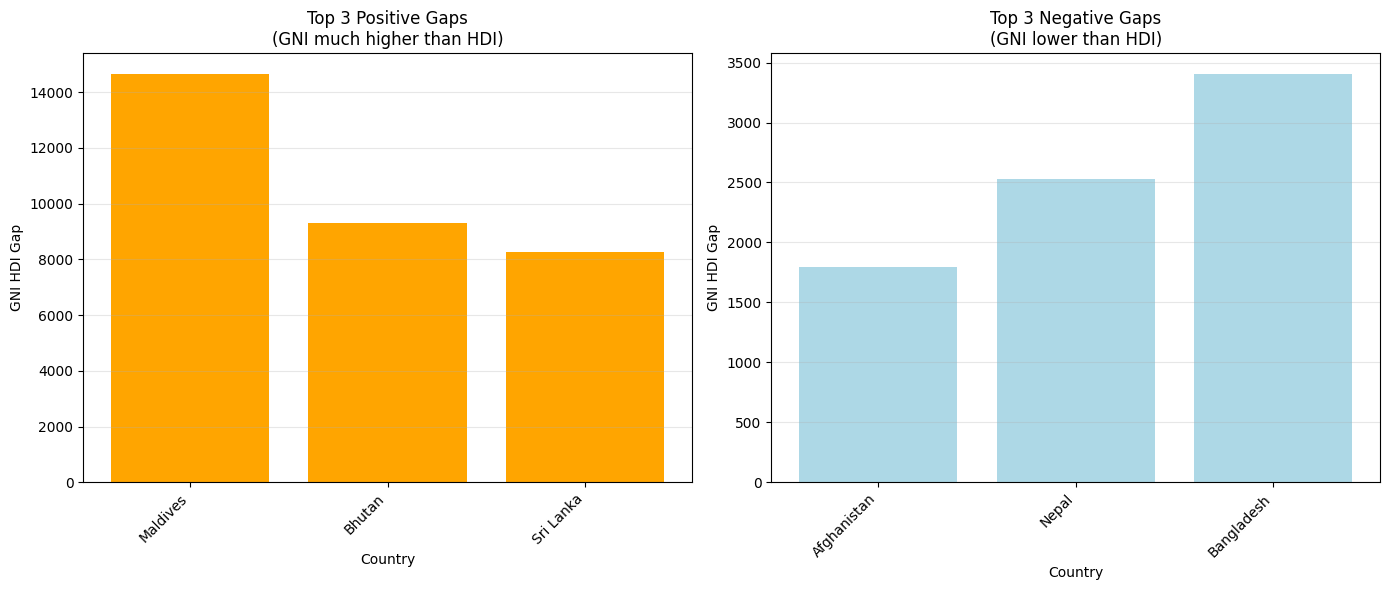

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
Problem 2
Advanced HDI Exploration
Objective:
Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics,
outlier detection,metric relationships, and gap analysis.
Tasks:
Complete all the following tasks:
1. Create South Asia Subset:
  - Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"].
  - Filter the HDI dataset to include only these countries.
  - Save the filtered dataset as HDI_SouthAsia.csv and include this file in the final submission.
"""
# reading data from the CSV file
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding_errors="ignore")

# listing south asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# filtering dataset
south_asian_df = df[df['country'].isin(south_asian_countries)]

# saving the filtered dataset
south_asian_df.to_csv("HDI_SouthAsia.csv", index=False)

'''
2. Composite Development Score:
  • Create a new metric called Composite Score using the formula:
        Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
      Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
  • Rank South Asian countries based on Composite Score.
  • Plot the top 5 countries in a horizontal bar chart.
  • Compare the ranking of countries by Composite Score with their HDI ranking and discuss any differences.
'''
# creating composite score using the formula given above
south_asian_df = south_asian_df.copy()
south_asian_df['composite_score'] = (0.30 * south_asian_df['life_expectancy']
                                     + 0.30 * south_asian_df['gross_inc_percap'])

# grouping by country and calculating mean score
composite_country = south_asian_df.groupby('country')['composite_score'].mean()
hdi_country = south_asian_df.groupby('country')['hdi'].mean()

# ranking south asian countries by composite score
composite_ranking = composite_country.sort_values(ascending=False)
comparison_df = composite_ranking.to_frame(name='composite_score')
comparison_df['hdi'] = hdi_country

# hdi_ranking = hdi_country.sort_values(ascending=False)

# selecting top 5 countries for plotting
top5_composite = composite_ranking.head(5)

# plotting top 5 countries in a horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(top5_composite.index, top5_composite.values)
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()
plt.show()

# comparing the ranking of countries by composite score with their HDI ranking
print("Top 5 ranking of countries by Composite Score with their HDI ranking:")
print(comparison_df.head())

'''
3. Outlier Detection:
  • Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
  • Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
  • Discuss why the identified countries stand out as outliers.
'''
# calculating IQR for HDI
q1_hdi = south_asian_df['hdi'].quantile(0.25)    # first quartile (25th percentile)
q3_hdi = south_asian_df['hdi'].quantile(0.75)    # third quartile (75th percentile)
iqr_hdi = q3_hdi - q1_hdi                 # interquartile range (IQR)

# calculating bounds for HDI outliers
lower_hdi = q1_hdi - 1.5 * iqr_hdi
upper_hdi = q3_hdi + 1.5 * iqr_hdi

# calculating IQR for GNI
q1_gni = south_asian_df['gross_inc_percap'].quantile(0.25)
q3_gni = south_asian_df['gross_inc_percap'].quantile(0.75)
iqr_gni = q3_gni - q1_gni

# calculating bounds for GNI outliers
lower_gni = q1_gni - 1.5 * iqr_gni
upper_gni = q3_gni + 1.5 * iqr_gni

# detecting outliers values beyond bounds
outliers = south_asian_df[
    (south_asian_df['hdi'] < lower_hdi) |
    (south_asian_df['hdi'] > upper_hdi) |
    (south_asian_df['gross_inc_percap'] < lower_gni) |
    (south_asian_df['gross_inc_percap'] > upper_gni)
]

total_outliers = len(outliers)
print(f"Total number of outliers: {total_outliers}")
print("Detected outliers countries:", outliers['country'].unique())

# scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color
plt.figure(figsize=(10,6))

# normal countries
plt.scatter(
    south_asian_df['gross_inc_percap'],
    south_asian_df['hdi'],
    label='Normal',
    alpha=0.7
)

# outliers
plt.scatter(
    outliers['gross_inc_percap'],
    outliers['hdi'],
    label='Outliers',
    alpha=0.9
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI (Outlier Detection)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

'''
4. Exploring Metric Relationships:
  • Select two HDI components (e.g., Gender Development Index {"gender_development"} and Life
    Expectancy Index {"life_expectancy"}).
  • Compute Pearson correlation of each metric with HDI.
  • Create scatter plots with trendlines to visualize the relationships.
  • Discuss:
    – Which metric is most strongly related to HDI and shows the weakest relationship with HDI.
'''
# selecting columns
gdi = df['gender_development']
life_exp = df['life_expectancy']
hdi = df['hdi']

# computing Pearson correlation with HDI
corr_gdi_hdi = gdi.corr(hdi)
corr_lifeexp_hdi = life_exp.corr(hdi)
print(f"Gender Development Index vs HDI correlation: {corr_gdi_hdi:.4f}")
print(f"Life Expectancy Index vs HDI correlation: {corr_lifeexp_hdi:.4f}")

# scatter plotting Gender Development Index vs HDI
# removing rows with missing Gender Development Index or HDI values
gdi_hdi = df[['gender_development', 'hdi']].dropna()

# creating scatter plot
plt.figure(figsize=(6,5))
plt.scatter(gdi_hdi['gender_development'], gdi_hdi['hdi'], alpha=0.6)

# adding trendline
z = np.polyfit(gdi_hdi['gender_development'], gdi_hdi['hdi'], 1)
p = np.poly1d(z)
plt.plot(gdi_hdi['gender_development'], p(gdi_hdi['gender_development']), linestyle='--')
plt.title(f"Gender Development Index vs HDI (r = {corr_gdi_hdi:.4f})")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.grid(alpha=0.3)
plt.show()

# scatter plotting Life Expectancy Index vs HDI
# removing rows with missing Life Expectancy Index or HDI values
lifeexp_hdi = df[['life_expectancy', 'hdi']].dropna()

# creating scatter plot
plt.figure(figsize=(6,5))
plt.scatter(lifeexp_hdi['life_expectancy'], lifeexp_hdi['hdi'], alpha=0.6)

# adding trendline
z = np.polyfit(lifeexp_hdi['life_expectancy'], lifeexp_hdi['hdi'], 1)
p = np.poly1d(z)
plt.plot(lifeexp_hdi['life_expectancy'], p(lifeexp_hdi['life_expectancy']), linestyle='--')
plt.title(f"Life Expectancy Index vs HDI (r = {corr_lifeexp_hdi:.4f})")
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.grid(alpha=0.3)
plt.show()

# identifying strongest and weakest relationship
if abs(corr_lifeexp_hdi) > abs(corr_gdi_hdi):
    print("Life Expectancy shows a stronger relationship with HDI.")
    print("Gender Development shows a weaker relationship with HDI.")
else:
    print("Gender Development shows a stronger relationship with HDI.")
    print("Life Expectancy shows a weaker relationship with HDI.")

'''
5. Gap Analysis:
  • Create a new metric:
      GNI HDI Gap = "gross inc percap" − "hdi"
  • Rank South Asian countries by GNI_HDI_Gap in descending and ascending order.
  • Plot the top 3 positive gaps and top 3 negative gaps.
  • Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.
'''
# creating new metric
south_asian_df['gni_hdi_gap'] = south_asian_df['gross_inc_percap'] - south_asian_df['hdi']

# ranking south asian countries by GNI_HDI_Gap in descending and ascending order
gap_country = south_asian_df.groupby('country')['gni_hdi_gap'].mean()
gap_desc = gap_country.sort_values(ascending=False)
gap_asc = gap_country.sort_values(ascending=True)
print("Top 3 countries by GNI_HDI_Gap in descending order:")
print(gap_desc.head(3))
print("Top 3 countries by GNI_HDI_Gap in ascending order:")
print(gap_asc.head(3))

top3_positive = gap_desc.head(3)
top3_negative = gap_asc.head(3)

# plotting top 3 positive and top 3 negative gaps
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# top 3 positive gaps
axes[0].bar(top3_positive.index, top3_positive.values, color='orange')
axes[0].set_title("Top 3 Positive Gaps\n(GNI much higher than HDI)")
axes[0].set_ylabel("GNI HDI Gap")
axes[0].set_xlabel("Country")
axes[0].set_xticklabels(top3_positive.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# top 3 negative gaps
axes[1].bar(top3_negative.index, top3_negative.values, color='lightblue')
axes[1].set_title("Top 3 Negative Gaps\n(GNI lower than HDI)")
axes[1].set_ylabel("GNI HDI Gap")
axes[1].set_xlabel("Country")
axes[1].set_xticklabels(top3_negative.index, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


South Asia countries: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']
Middle East countries: ['Bahrain' 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Lebanon' 'Oman' 'Qatar'
 'Saudi Arabia' 'United Arab Emirates' 'Yemen']
Descriptive Statistics of HDI (2020–2022):
South Asia - Mean HDI: 0.6396, Standard Deviation: 0.0983
Middle East - Mean HDI: 0.7889, Standard Deviation: 0.1413

On average, Middle East performs better in HDI than South Asia.
Top 3 performing South Asian Counries
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64
Bottom 3 performing South Asian Counries
 country
Afghanistan    0.474333
Pakistan       0.537667
Nepal          0.595000
Name: hdi, dtype: float64
Top 3 performing Middle Eastern Counries
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64
Bottom 3 performing Middle Eastern Counries
 country
Yemen   

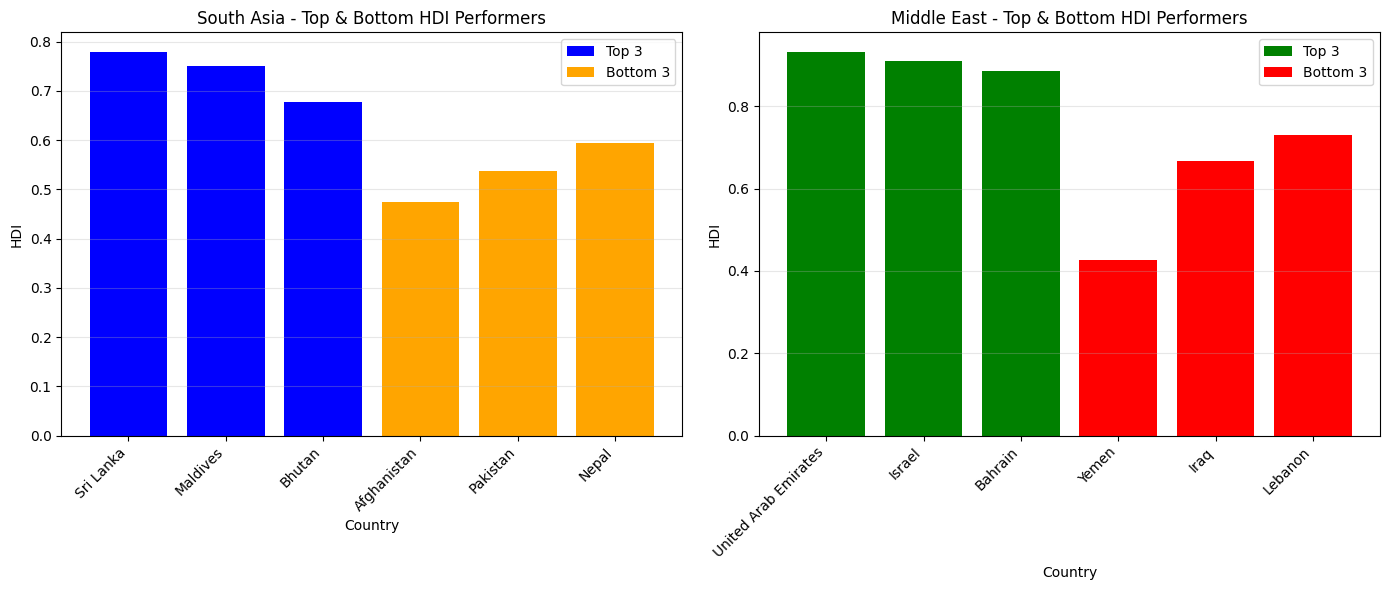

Average metrics by region: 
                      South Asia   Middle East
gender_development     0.881458      0.896545
life_expectancy       70.970083     75.855455
gross_inc_percap    7766.509931  37750.770520


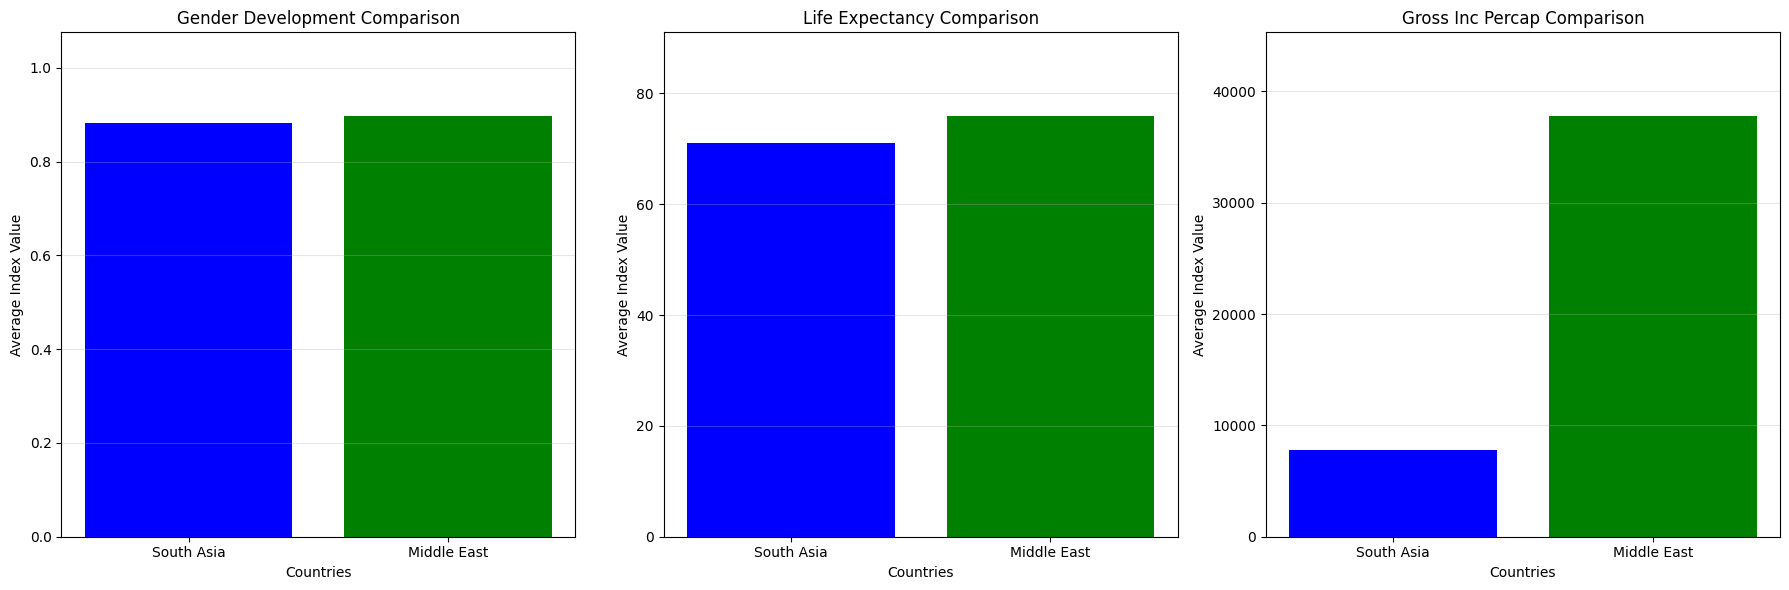


The metric with the greatest disparity between regions is: gross_inc_percap
gender_development        0.015087
life_expectancy           4.885371
gross_inc_percap      29984.260588
dtype: float64
HDI Disparity (2020–2022):
South Asia - Range: 0.3210, Coefficient of Variation: 0.1537
Middle East - Range: 0.5130, Coefficient of Variation: 0.1791

Middle East exhibits more variation in HDI across countries.
South Asia Correlations:


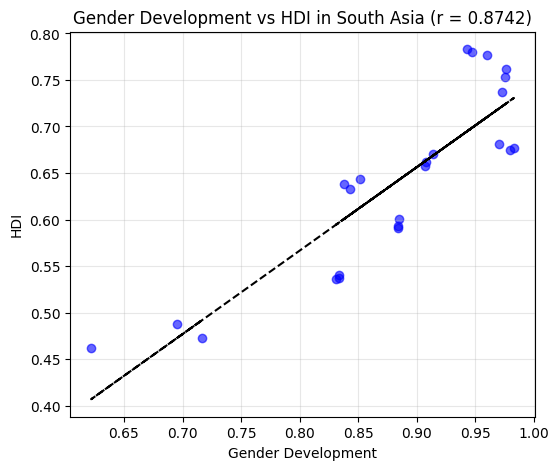

HDI vs Gender Development: r = 0.8742


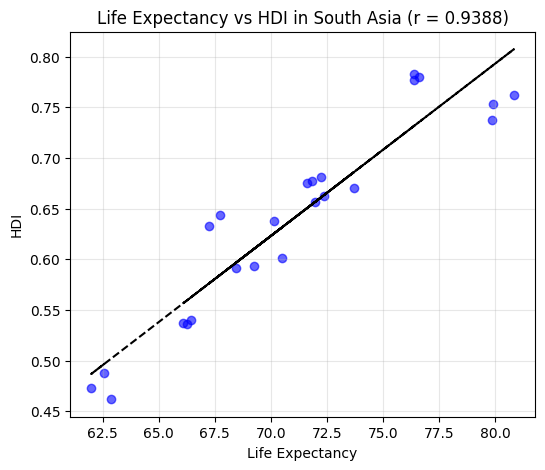

HDI vs Life Expectancy: r = 0.9388

Middle East Correlations:


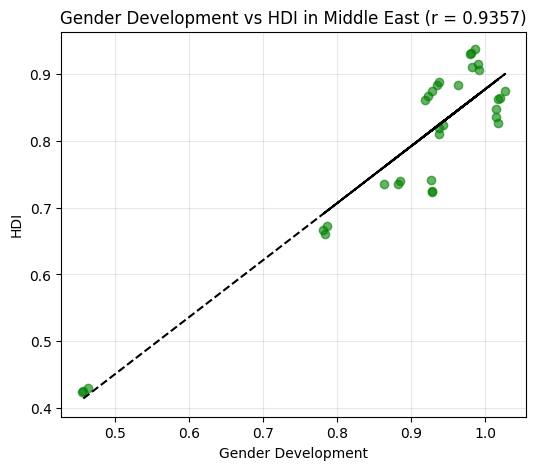

HDI vs Gender Development: r = 0.9357


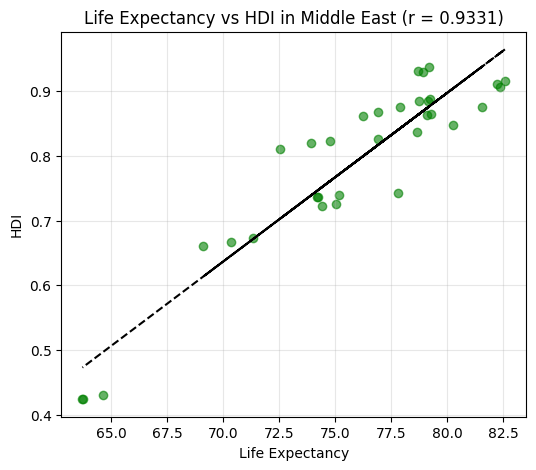

HDI vs Life Expectancy: r = 0.9331
South Asian Outliers (HDI or GNI per Capita):
Empty DataFrame
Columns: [country, hdi, gross_inc_percap]
Index: []
Middle Eastern Outliers (HDI or GNI per Capita):
    country    hdi  gross_inc_percap
576   Yemen  0.430       1152.015672
577   Yemen  0.425       1112.162989
578   Yemen  0.424       1105.763435


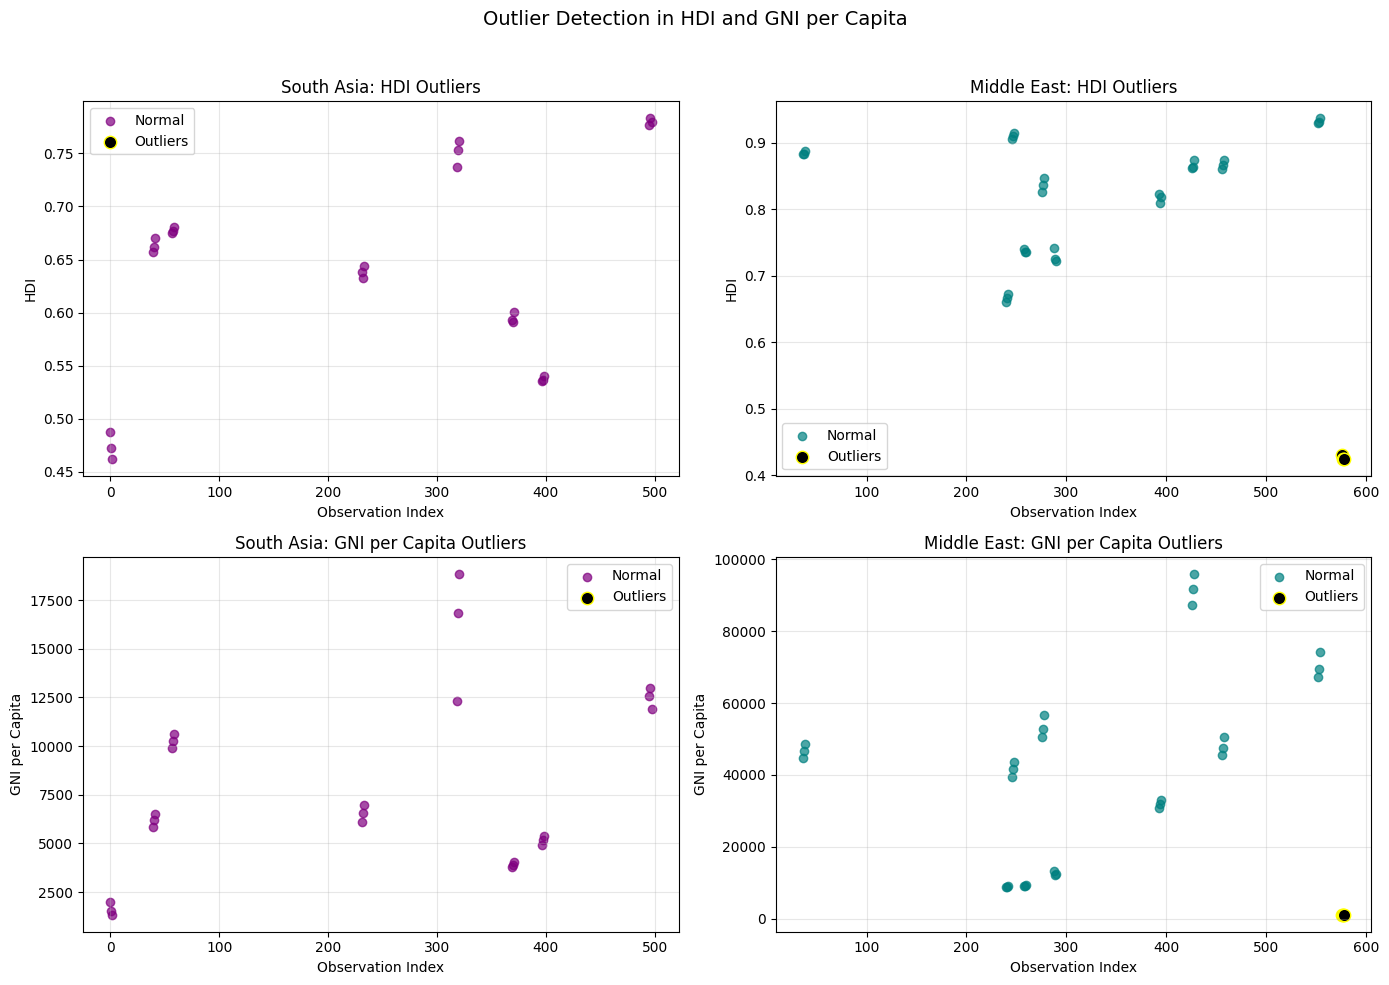

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

'''
Problem 3
Comparative Regional Analysis: South Asia vs Middle East
Objective:
Perform a comparative analysis of HDI and related metrics between South Asia and
the Middle East using the 2020–2022 dataset from Problem 1B.
Tasks:
Complete all the following tasks:
1. Create Middle East Subset:
  • Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"].
  • Filter the dataset from Problem 1B (HDI_problem1B.csv) to create subsets for South Asia and Middle East.
  • Save these subsets as HDI_SouthAsia_2020_2022.csv and HDI_MiddleEast_2020_2022.csv for
    use in subsequent tasks.
'''
# reading data from the CSV file
df = pd.read_csv("HDI_problem1B.csv", encoding_errors="ignore")

# defining South Asia and Middle East countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# filtering subsets
south_asian_df = df[df['country'].isin(south_asian_countries)]
middle_east_df = df[df['country'].isin(middle_east_countries)]

# saving subsets
south_asian_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print(f"South Asia countries: {south_asian_df['country'].unique()}")
print(f"Middle East countries: {middle_east_df['country'].unique()}")

'''
2. Descriptive Statistics:
  • Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
    across 2020–2022.
  • Identify which region performs better on average.
'''
# computing mean and standard deviation of HDI for each region
south_asian_mean = south_asian_df['hdi'].mean()
south_asian_std = south_asian_df['hdi'].std()

middle_east_mean = middle_east_df['hdi'].mean()
middle_east_std = middle_east_df['hdi'].std()

print("Descriptive Statistics of HDI (2020–2022):")
print(f"South Asia - Mean HDI: {south_asian_mean:.4f}, Standard Deviation: {south_asian_std:.4f}")
print(f"Middle East - Mean HDI: {middle_east_mean:.4f}, Standard Deviation: {middle_east_std:.4f}\n")

# identifying which region performs better on average
if south_asian_mean > middle_east_mean:
    print("On average, South Asia performs better in HDI than the Middle East.")
elif south_asian_mean < middle_east_mean:
    print("On average, Middle East performs better in HDI than South Asia.")
else:
    print("Both regions perform equally on average in HDI.")

'''
3. Top and Bottom Performers:
  • Identify the top 3 and bottom 3 countries in each region based on HDI.
  • Create a bar chart comparing these top and bottom performers across the two regions.
'''
# identifying top 3 and bottom 3 South Asia countries based on HDI
top3_south_asian = south_asian_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom3_south_asian = south_asian_df.groupby('country')['hdi'].mean().sort_values(ascending=True).head(3)
print("Top 3 performing South Asian Counries\n", top3_south_asian)
print("Bottom 3 performing South Asian Counries\n", bottom3_south_asian)

# identifying top 3 and bottom 3 Middle Eastern countries based on HDI
top3_middle_eastern = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False).head(3)
bottom3_middle_eastern = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=True).head(3)
print("Top 3 performing Middle Eastern Counries\n", top3_middle_eastern)
print("Bottom 3 performing Middle Eastern Counries\n", bottom3_middle_eastern)

# creating bar chart comparing the top and the both performs across two regions
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# south asia's bar chart
axes[0].bar(top3_south_asian.index, top3_south_asian.values, color='blue', label='Top 3')
axes[0].bar(bottom3_south_asian.index, bottom3_south_asian.values, color='orange', label='Bottom 3')
axes[0].set_title("South Asia - Top & Bottom HDI Performers")
axes[0].set_ylabel("HDI")
axes[0].set_xlabel("Country")
axes[0].set_xticklabels(list(top3_south_asian.index) + list(bottom3_south_asian.index), rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# middle east's bar chart
axes[1].bar(top3_middle_eastern.index, top3_middle_eastern.values, color='green', label='Top 3')
axes[1].bar(bottom3_middle_eastern.index, bottom3_middle_eastern.values, color='red', label='Bottom 3')
axes[1].set_title("Middle East - Top & Bottom HDI Performers")
axes[1].set_ylabel("HDI")
axes[1].set_xlabel("Country")
axes[1].set_xticklabels(list(top3_middle_eastern.index) + list(bottom3_middle_eastern.index), rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

'''
4. Metric Comparisons:
  • Compare the following metrics across regions using grouped bar charts:
    – Gender Development Index {"gender development"}
    – Life Expectancy Index {"life expectancy"}
    – GNI per Capita Index {"gross inc percap"}
  • Identify which metric shows the greatest disparity between regions.
'''
# metrics we need to compare
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

# computing mean of each metric for each region
south_asian_mean = south_asian_df[metrics].mean(skipna=True)
middle_east_mean = middle_east_df[metrics].mean(skipna=True)

# creating a df for plotting
comparison_df = pd.DataFrame({
    'South Asia': south_asian_mean,
    'Middle East': middle_east_mean
})
print("Average metrics by region: \n", comparison_df)

# creating subplots for each metric (3 subplots side by side)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

colors_south_asian = ['blue', 'blue', 'blue']
colors_middle_east = ['green', 'green', 'green']

for i, metric in enumerate(metrics):
    axes[i].bar('South Asia', south_asian_mean[metric], color=colors_south_asian[i])
    axes[i].bar('Middle East', middle_east_mean[metric], color=colors_middle_east[i])
    axes[i].set_title(f"{metric.replace('_',' ').title()} Comparison")
    axes[i].set_ylabel("Average Index Value")
    axes[i].set_xlabel("Countries")
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].set_ylim(0, max(south_asian_mean[metric], middle_east_mean[metric]) * 1.2)

plt.tight_layout()
plt.show()

# identifying which metric shows the greatest disparity between regions
disparity = abs(south_asian_mean - middle_east_mean)
greatest_disparity_metric = disparity.idxmax()
print(f"\nThe metric with the greatest disparity between regions is: {greatest_disparity_metric}\n{disparity}")

'''
5. HDI Disparity:
  • Compute the range (max – min) of HDI for each region.
  • Compute the coefficient of variation (CV = std/mean) for HDI.
  • Identify which region exhibits more variation in HDI.
'''
# computing the range (max-min) of HDI for each region
south_asian_range = south_asian_df['hdi'].max() - south_asian_df['hdi'].min()
middle_east_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

# computing the coefficient of variation (CV = std/mean) for HDI
south_asian_cv = south_asian_df['hdi'].std() / south_asian_df['hdi'].mean()
middle_east_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()

print("HDI Disparity (2020–2022):")
print(f"South Asia - Range: {south_asian_range:.4f}, Coefficient of Variation: {south_asian_cv:.4f}")
print(f"Middle East - Range: {middle_east_range:.4f}, Coefficient of Variation: {middle_east_cv:.4f}")

# identifying which region exhibits more variation in HDI
if south_asian_cv > middle_east_cv:
    print("\nSouth Asia exhibits more variation in HDI across countries.")
elif middle_east_cv > south_asian_cv:
    print("\nMiddle East exhibits more variation in HDI across countries.")
else:
    print("\nBoth regions exhibit similar variation in HDI across countries.")

'''
6. Correlation Analysis:
  • For each region, compute correlations of HDI with:
    – Gender Development Index
    – Life Expectancy Index
  • Create scatter plots with trendlines for each correlation.
  • Interpret the strength and direction of these relationships.
'''
# the metrics we need for computing correlations
corr_metrics = ['gender_development', 'life_expectancy']

# function for plotting the scatter with trendlines
def plot_corr(df, x_col, y_col, region_name, color):
  # dropping missing values
  data = df[[x_col, y_col]].dropna()

  # computing Pearson correlation
  corr = data[x_col].corr(data[y_col])

  # scatter plotting with trendlines for each correlation
  plt.figure(figsize=(6,5))
  plt.scatter(data[x_col], data[y_col], color=color, alpha=0.6)
  z = np.polyfit(data[x_col], data[y_col], 1)
  p = np.poly1d(z)
  plt.plot(data[x_col], p(data[x_col]), linestyle='--', color='black')
  plt.title(f"{x_col.replace('_',' ').title()} vs HDI in {region_name} (r = {corr:.4f})")
  plt.xlabel(x_col.replace('_',' ').title())
  plt.ylabel("HDI")
  plt.grid(alpha=0.3)
  plt.show()

  return corr

print("South Asia Correlations:")
for metric in corr_metrics:
    corr_value = plot_corr(south_asian_df, metric, 'hdi', 'South Asia', 'blue')
    print(f"HDI vs {metric.replace('_',' ').title()}: r = {corr_value:.4f}")

print("\nMiddle East Correlations:")
for metric in corr_metrics:
    corr_value = plot_corr(middle_east_df, metric, 'hdi', 'Middle East', 'green')
    print(f"HDI vs {metric.replace('_',' ').title()}: r = {corr_value:.4f}")

'''
7. Outlier Detection:
  • Detect outliers in HDI {"hdi"} and GNI per Capita {"gross_inc_percap"}
    for each region using the 1.5 × IQR rule.
  • Create scatter plots highlighting outliers in a different color.
  • Discuss the significance of these outliers.
'''
# detecting outliers in HDI {"hdi"} and GNI per Capita {"gross_inc_percap"} using the 1.5 × IQR rule (South Asia)
q1_hdi_south_asian = south_asian_df['hdi'].quantile(0.25)
q3_hdi_south_asian= south_asian_df['hdi'].quantile(0.75)
iqr_hdi_south_asian = q3_hdi_south_asian - q1_hdi_south_asian
lower_hdi_south_asian = q1_hdi_south_asian - 1.5 * iqr_hdi_south_asian
upper_hdi_south_asian = q3_hdi_south_asian + 1.5 * iqr_hdi_south_asian

q1_gni_south_asian = south_asian_df['gross_inc_percap'].quantile(0.25)
q3_gni_south_asian= south_asian_df['gross_inc_percap'].quantile(0.75)
iqr_gni_south_asian = q3_gni_south_asian - q1_gni_south_asian
lower_gni_south_asian = q1_gni_south_asian - 1.5 * iqr_gni_south_asian
upper_gni_south_asian = q3_gni_south_asian + 1.5 * iqr_gni_south_asian

south_asian_outliers = south_asian_df[
    (south_asian_df['hdi'] < lower_hdi_south_asian) |
    (south_asian_df['hdi'] > upper_hdi_south_asian) |
    (south_asian_df['gross_inc_percap'] < lower_gni_south_asian) |
    (south_asian_df['gross_inc_percap'] > upper_gni_south_asian)
]

print("South Asian Outliers (HDI or GNI per Capita):")
print(south_asian_outliers[['country', 'hdi', 'gross_inc_percap']])

# detecting outliers in HDI {"hdi"} and GNI per Capita {"gross_inc_percap"} using the 1.5 × IQR rule (Middle East)
q1_hdi_middle_east = middle_east_df['hdi'].quantile(0.25)
q3_hdi_middle_east= middle_east_df['hdi'].quantile(0.75)
iqr_hdi_middle_east = q3_hdi_middle_east - q1_hdi_middle_east
lower_hdi_middle_east = q1_hdi_middle_east - 1.5 * iqr_hdi_middle_east
upper_hdi_middle_east = q3_hdi_middle_east + 1.5 * iqr_hdi_middle_east

q1_gni_middle_east = middle_east_df['gross_inc_percap'].quantile(0.25)
q3_gni_middle_east= middle_east_df['gross_inc_percap'].quantile(0.75)
iqr_gni_middle_east = q3_gni_middle_east - q1_gni_middle_east
lower_gni_middle_east = q1_gni_middle_east - 1.5 * iqr_gni_middle_east
upper_gni_middle_east = q3_gni_middle_east + 1.5 * iqr_gni_middle_east

middle_east_outliers = middle_east_df[
    (middle_east_df['hdi'] < lower_hdi_middle_east) |
    (middle_east_df['hdi'] > upper_hdi_middle_east) |
    (middle_east_df['gross_inc_percap'] < lower_gni_middle_east) |
    (middle_east_df['gross_inc_percap'] > upper_gni_middle_east)
]

print("Middle Eastern Outliers (HDI or GNI per Capita):")
print(middle_east_outliers[['country', 'hdi', 'gross_inc_percap']])

# creating scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Outlier Detection in HDI and GNI per Capita", fontsize=14)

# South Asia (HDI)
axes[0,0].scatter(
    south_asian_df.index,
    south_asian_df['hdi'],
    color='purple',
    alpha=0.7,
    label='Normal'
)

axes[0,0].scatter(
    south_asian_outliers.index,
    south_asian_outliers['hdi'],
    color='black',
    edgecolor='yellow',
    s=80,
    label='Outliers'
)

axes[0,0].set_title("South Asia: HDI Outliers")
axes[0,0].set_xlabel("Observation Index")
axes[0,0].set_ylabel("HDI")
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)


# Middle East (HDI)
axes[0,1].scatter(
    middle_east_df.index,
    middle_east_df['hdi'],
    color='teal',
    alpha=0.7,
    label='Normal'
)

axes[0,1].scatter(
    middle_east_outliers.index,
    middle_east_outliers['hdi'],
    color='black',
    edgecolor='yellow',
    s=80,
    label='Outliers'
)

axes[0,1].set_title("Middle East: HDI Outliers")
axes[0,1].set_xlabel("Observation Index")
axes[0,1].set_ylabel("HDI")
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)


# # South Asia (GNI)
axes[1,0].scatter(
    south_asian_df.index,
    south_asian_df['gross_inc_percap'],
    color='purple',
    alpha=0.7,
    label='Normal'
)

axes[1,0].scatter(
    south_asian_outliers.index,
    south_asian_outliers['gross_inc_percap'],
    color='black',
    edgecolor='yellow',
    s=80,
    label='Outliers'
)

axes[1,0].set_title("South Asia: GNI per Capita Outliers")
axes[1,0].set_xlabel("Observation Index")
axes[1,0].set_ylabel("GNI per Capita")
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)


# Middle East (GNI)
axes[1,1].scatter(
    middle_east_df.index,
    middle_east_df['gross_inc_percap'],
    color='teal',
    alpha=0.7,
    label='Normal'
)

axes[1,1].scatter(
    middle_east_outliers.index,
    middle_east_outliers['gross_inc_percap'],
    color='black',
    edgecolor='yellow',
    s=80,
    label='Outliers'
)

axes[1,1].set_title("Middle East: GNI per Capita Outliers")
axes[1,1].set_xlabel("Observation Index")
axes[1,1].set_ylabel("GNI per Capita")
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
